In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


import plotly.io as pio
pio.renderers.default = 'notebook'

[09/27/23 21:29:13] WARNING  C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\ ]8;id=263883;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=62368;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils                      
                             Version classes are deprecated. Use packaging.version instead.                        
                               if LooseVersion(mpl.__version__) >= "3.0":                                          
                                                                                                                   

                    WARNING  C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\ ]8;id=910757;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=793681;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             site-packages\setuptools\_distutils\version.py:345:                                   
                             DeprecationWarning: distutils Version classes are deprecated. Use                     
                             packaging.version instead.                                                            
                               other = LooseVersion(other)                                                         
                                                                                                                   

                    WARNING  C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\ ]8;id=781740;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=48088;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             site-packages\seaborn\cm.py:1582: MatplotlibDeprecationWarning: The                   
                             register_cmap function was deprecated in Matplotlib 3.7 and will be                   
                             removed two minor releases later. Use                                                 
                             ``matplotlib.colormaps.register(name)`` instead.                                      
                               mpl_cm.register_cmap(_name, _cmap)                                                  
                                                                                                                   

                    WARNING  C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\ ]8;id=55594;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=676589;file://C:\Users\USER.ACIES-RN004\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             site-packages\seaborn\cm.py:1583: MatplotlibDeprecationWarning: The                   
                             register_cmap function was deprecated in Matplotlib 3.7 and will be                   
                             removed two minor releases later. Use                                                 
                             ``matplotlib.colormaps.register(name)`` instead.                                      
                               mpl_cm.register_cmap(_name + "_r", _cmap_r)                                         
                                                                                                                   

In [2]:
df = pd.read_csv("../data/01_raw/predictive_maintenance.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


**UDI:** This might stand for Unique Device Identifier, a unique code or number assigned to a medical device.

**Product ID:** An identifier for the product or item being tracked.

**Type:** The type or category of the product.

**Air temperature [K]:** The air temperature, typically measured in Kelvin (K).

**Process temperature [K]:** The process temperature, also measured in Kelvin (K). This could be the temperature of a manufacturing process.

**Rotational speed [rpm]:** The rotational speed of a component, usually measured in revolutions per minute (rpm).

**Torque [Nm]:** Torque, measured in Newton-meters (Nm), which is a measure of rotational force.

**Tool wear [min]:** The amount of wear or usage time for a tool, often measured in minutes.

**Machine failure:** A binary column indicating whether the machine has experienced a failure (1 for failure, 0 for no failure).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [6]:
df.nunique()/len(df)

UDI                        1.0000
Product ID                 1.0000
Type                       0.0003
Air temperature [K]        0.0093
Process temperature [K]    0.0082
Rotational speed [rpm]     0.0941
Torque [Nm]                0.0577
Tool wear [min]            0.0246
Target                     0.0002
Failure Type               0.0006
dtype: float64

In [7]:
df = df.drop(["UDI","Product ID"], axis=1, errors="ignore")

In [8]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
df.nunique()

Type                         3
Air temperature [K]         93
Process temperature [K]     82
Rotational speed [rpm]     941
Torque [Nm]                577
Tool wear [min]            246
Target                       2
Failure Type                 6
dtype: int64

In [10]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [11]:
target = df['Target'].value_counts()

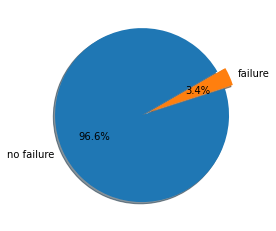

In [12]:
plt.pie(target,explode=(0,0.1),labels=['no failure','failure'],autopct='%1.1f%%',shadow=True, startangle=30);

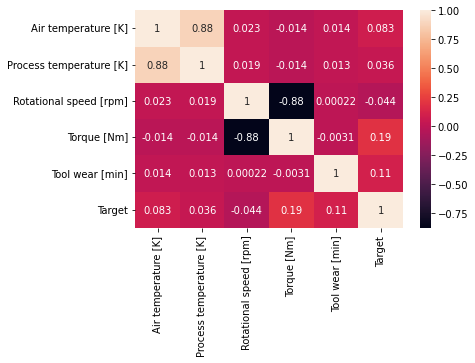

In [13]:
sns.heatmap(df.corr(), annot=True)

<seaborn.axisgrid.PairGrid object at 0x0000021092F47F10>

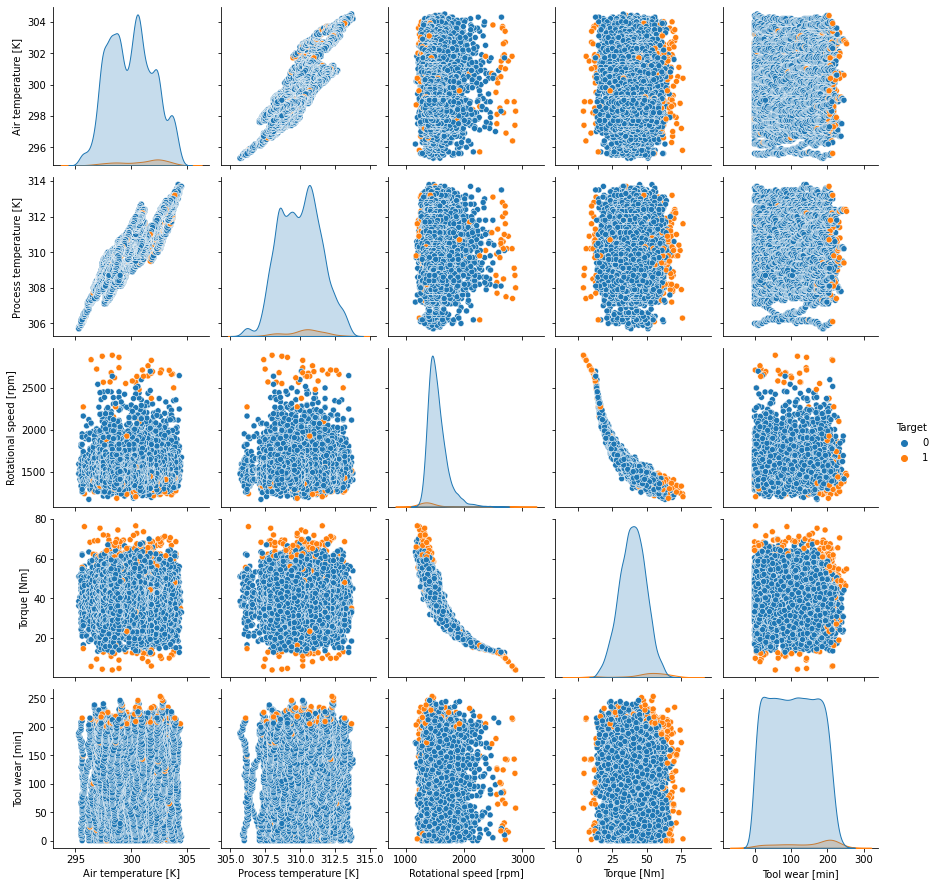

In [14]:
sns.pairplot(data=df, hue="Target", plot_kws=dict(alpha=1.0))

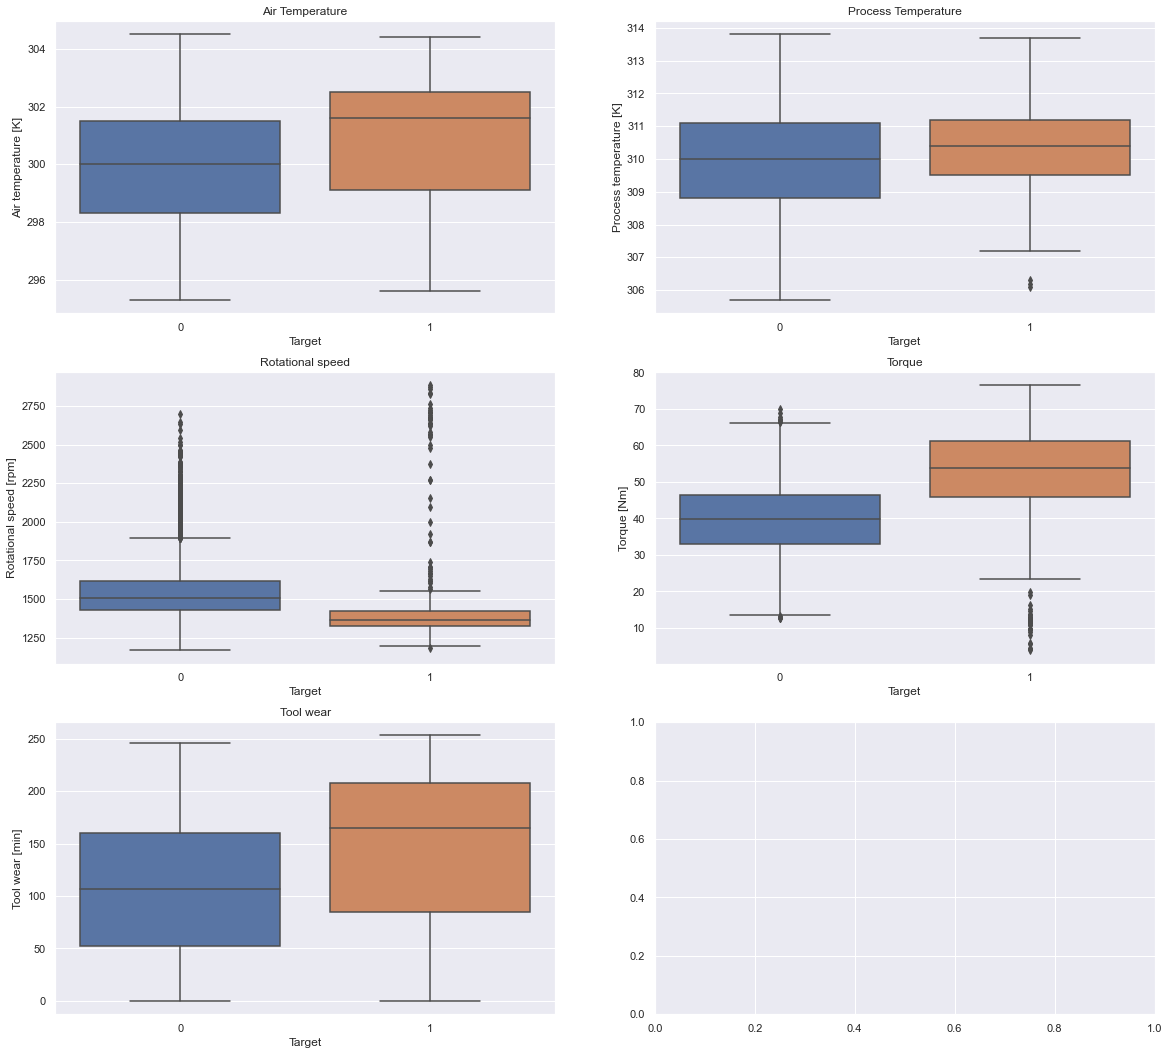

In [15]:
sns.set(rc={'figure.figsize':(19.7,18.27)})
fig, axes = plt.subplots(3, 2)
g1 = sns.boxplot(data=df, y="Air temperature [K]", x="Target", ax=axes[0,0])
g2 = sns.boxplot(data=df, y="Process temperature [K]", x="Target", ax=axes[0,1])
g3 = sns.boxplot(data=df, y="Rotational speed [rpm]", x="Target", ax=axes[1,0])
g4 = sns.boxplot(data=df, y="Torque [Nm]", x="Target", ax=axes[1,1])
g5 = sns.boxplot(data=df, y="Tool wear [min]", x="Target", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

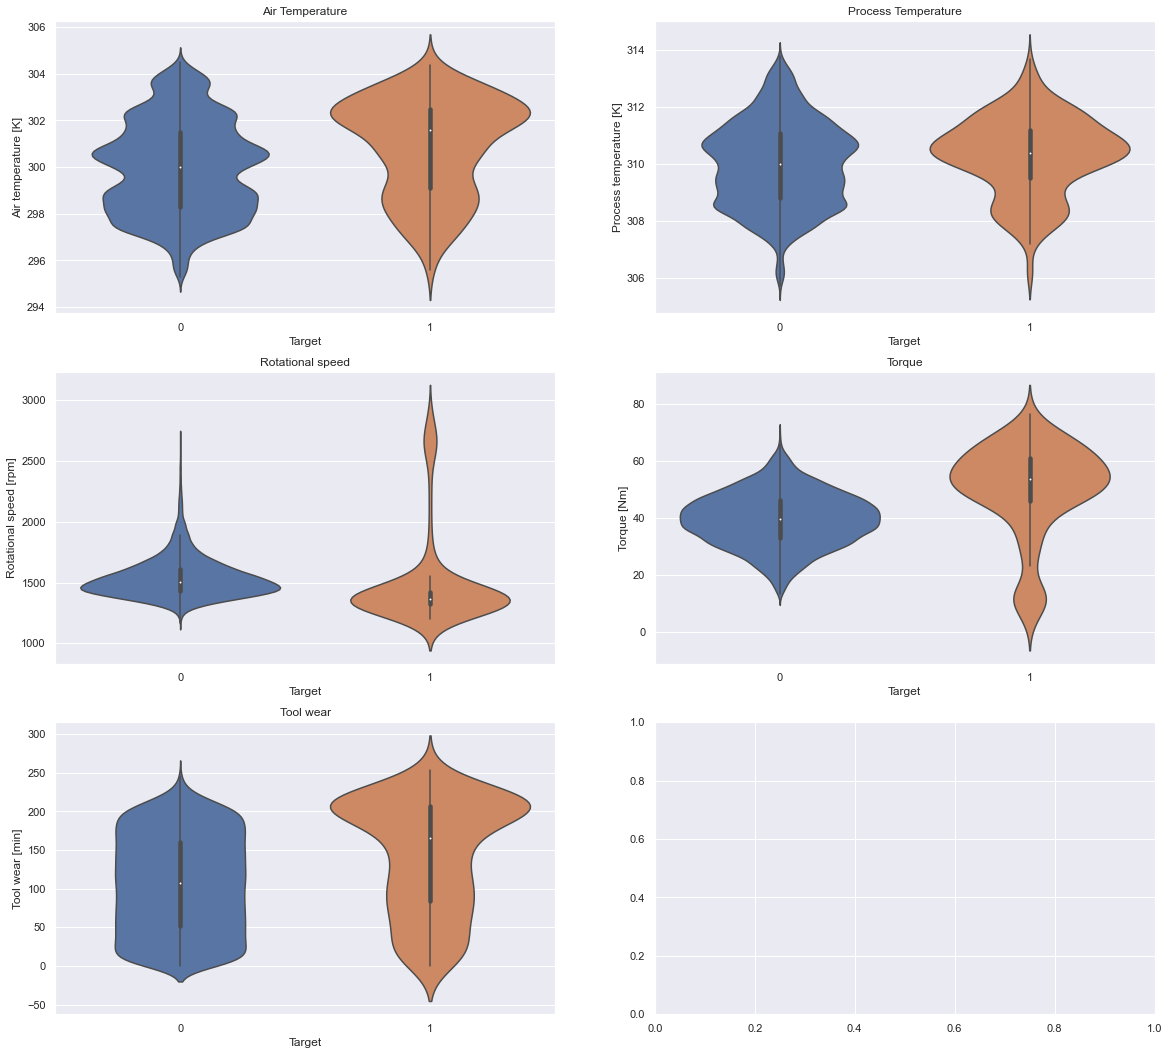

In [16]:
fig, axes = plt.subplots(3, 2)
g1 = sns.violinplot(data=df, y="Air temperature [K]", x="Target", ax=axes[0,0])
g2 = sns.violinplot(data=df, y="Process temperature [K]", x="Target", ax=axes[0,1])
g3 = sns.violinplot(data=df, y="Rotational speed [rpm]", x="Target", ax=axes[1,0])
g4 = sns.violinplot(data=df, y="Torque [Nm]", x="Target", ax=axes[1,1])
g5 = sns.violinplot(data=df, y="Tool wear [min]", x="Target", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")

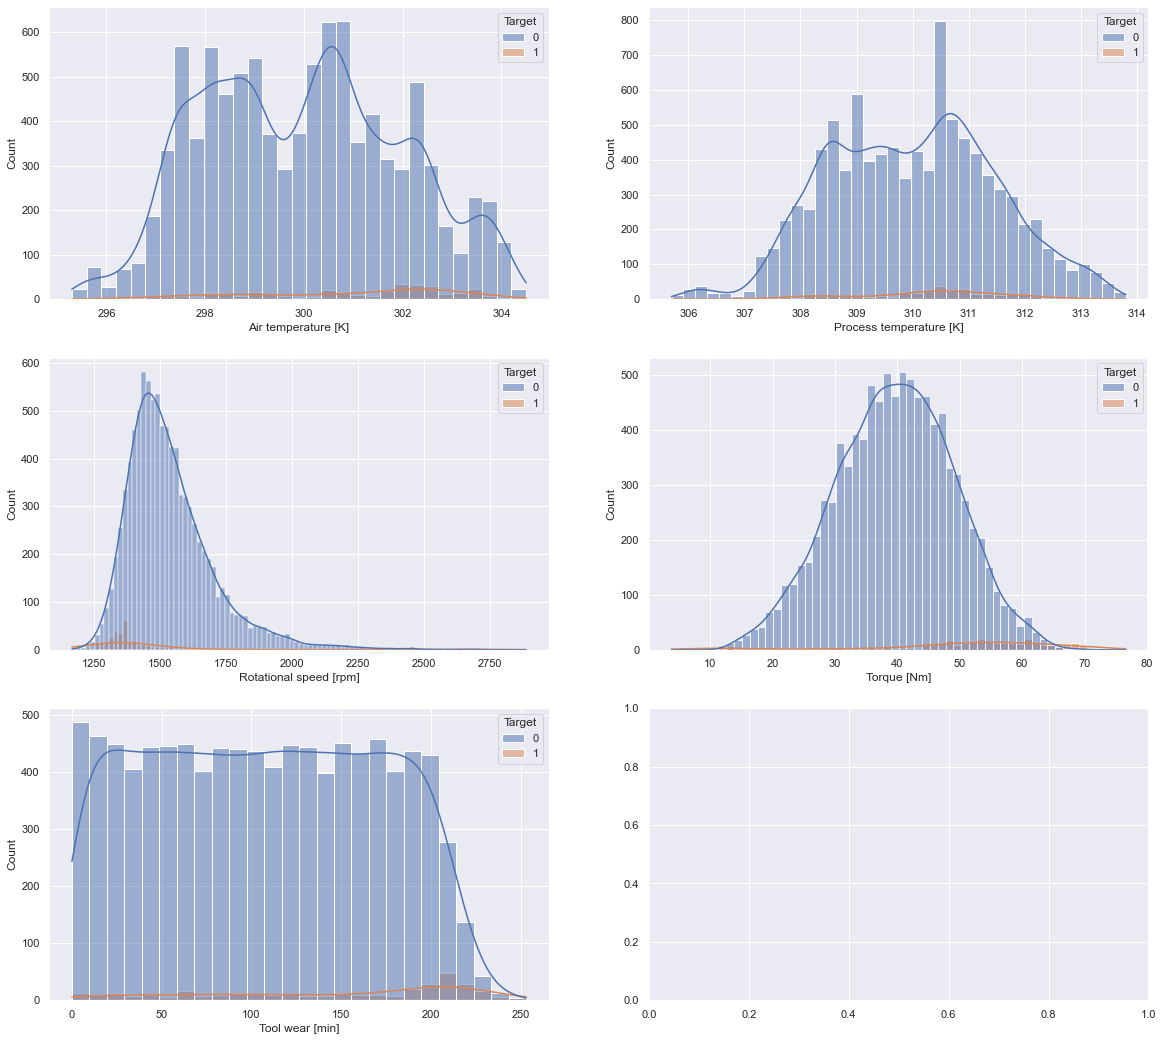

In [17]:
fig, axes = plt.subplots(3, 2)
sns.histplot(data=df, x="Air temperature [K]", hue="Target", kde=True, ax=axes[0,0])
sns.histplot(data=df, x="Process temperature [K]", hue="Target", kde=True, ax=axes[0,1])
sns.histplot(data=df, x="Rotational speed [rpm]", hue="Target", kde=True, ax=axes[1,0])
sns.histplot(data=df, x="Torque [Nm]", hue="Target", kde=True, ax=axes[1,1])
sns.histplot(data=df, x="Tool wear [min]", hue="Target", kde=True, ax=axes[2,0])

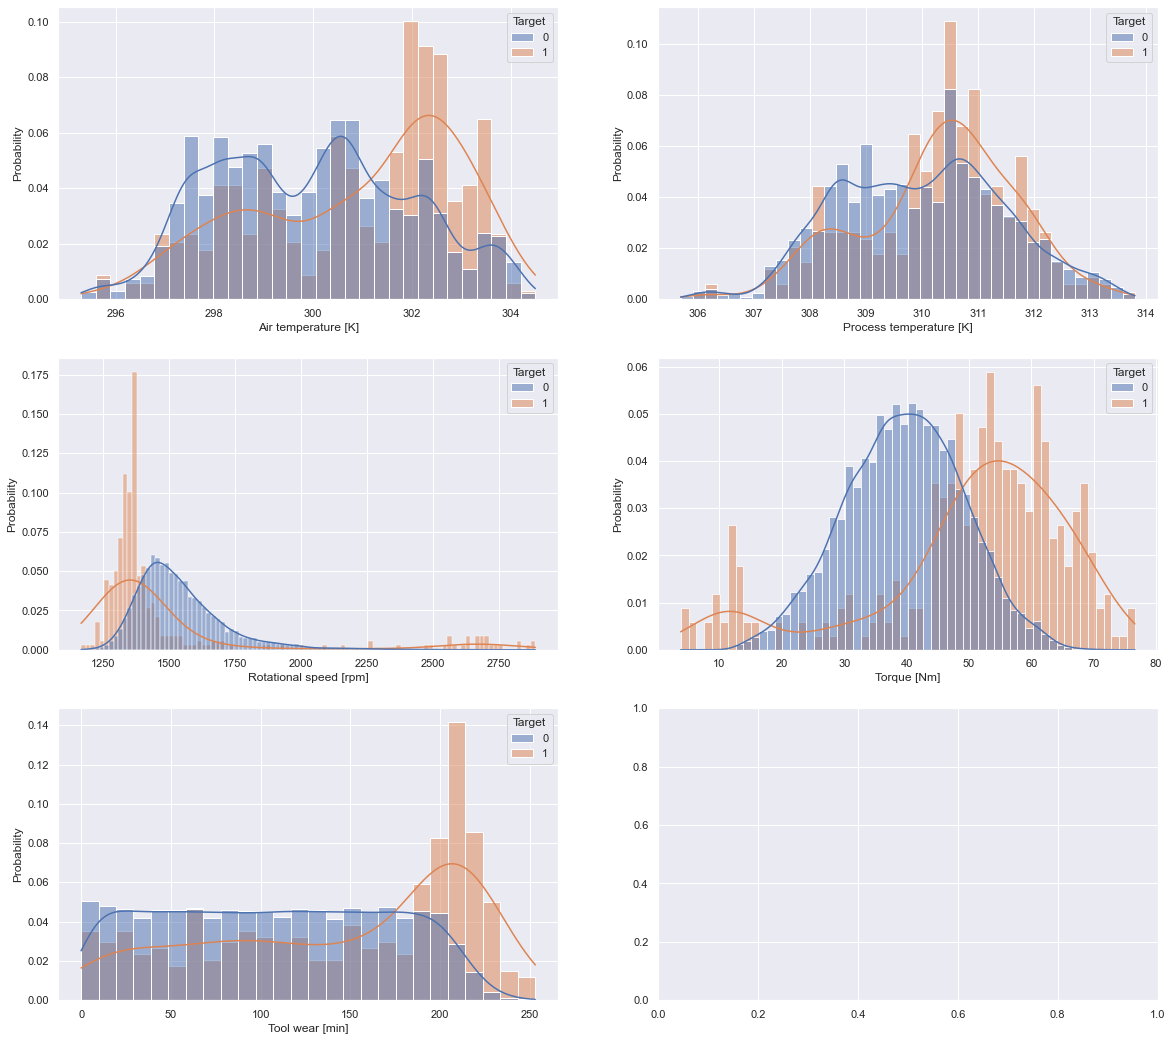

In [18]:
fig, axes = plt.subplots(3, 2)
sns.histplot(data=df, x="Air temperature [K]", hue="Target", kde=True, ax=axes[0,0], stat="probability", common_norm=False)
sns.histplot(data=df, x="Process temperature [K]", hue="Target", kde=True, ax=axes[0,1], stat="probability", common_norm=False)
sns.histplot(data=df, x="Rotational speed [rpm]", hue="Target", kde=True, ax=axes[1,0], stat="probability", common_norm=False)
sns.histplot(data=df, x="Torque [Nm]", hue="Target", kde=True, ax=axes[1,1], stat="probability", common_norm=False)
sns.histplot(data=df, x="Tool wear [min]", hue="Target", kde=True, ax=axes[2,0], stat="probability", common_norm=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [19]:
from sklearn.model_selection import train_test_split

df = pd.concat([df,pd.get_dummies(df['Type'])],axis=1)

X = df.drop(["Target","Failure Type","Type"], axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [20]:
duplicate = df[df.duplicated(keep = "first")]
duplicate.shape

(0, 11)

In [21]:
from sklearn.preprocessing import StandardScaler

to_scale = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

sc = StandardScaler()
X_train[to_scale] = sc.fit_transform(X_train[to_scale])
X_test[to_scale] = sc.transform(X_test[to_scale])

In [22]:
X_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Air temperature [K],8000.0,-3.342171e-14,1.000063,-2.352493,-0.854066,0.044990,0.744256,2.242683
Process temperature [K],8000.0,-2.343170e-14,1.000063,-2.897008,-0.811420,0.063182,0.735952,2.552432
Rotational speed [rpm],8000.0,1.811884e-16,1.000063,-1.981233,-0.641128,-0.203655,0.401330,7.460419
Torque [Nm],8000.0,-3.126388e-16,1.000063,-3.628570,-0.682245,0.019261,0.680681,3.627006
Tool wear [min],8000.0,9.414691e-17,1.000063,-1.709378,-0.871050,-0.001087,0.853058,2.292451
H,8000.0,1.002500e-01,0.300352,0.000000,0.000000,0.000000,0.000000,1.000000
L,8000.0,5.970000e-01,0.490531,0.000000,0.000000,1.000000,1.000000,1.000000
M,8000.0,3.027500e-01,0.459477,0.000000,0.000000,0.000000,1.000000,1.000000


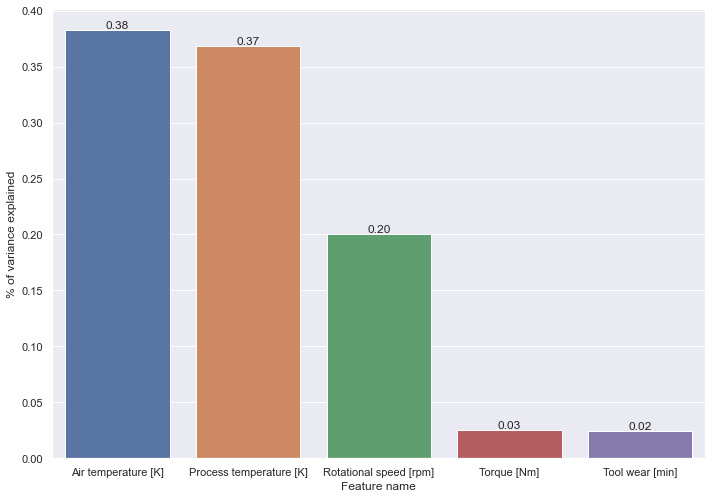

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
pca.fit(X_train.drop(['L','M','H'],axis=1), y_train)
# print(pca.explained_variance_ratio_)

ax = sns.barplot(x=X_train.drop(['L','M','H'],axis=1).columns, y=pca.explained_variance_ratio_);
ax.set(xlabel="Feature name", ylabel="% of variance explained");
ax.bar_label(ax.containers[0], fmt='%.2f');

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

result = {}
for model,name in zip([lr, knn, svc, dtc, rfc],
                     ["Logistic Regression", "KNN", "SVC", "Decision Tree", "Random Forest"]):
    result[name] = fit_model(model, X_train, X_test, y_train, y_test)

In [26]:
df_result = pd.DataFrame(np.array(list(result.values())),
                       columns= ["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"], 
                       index= result.keys())

df_result.index.name = "Model"   # name the index of the result1 dataframe as 'Model'
df_result

,ACCURACY,PRECISION,RECALL,F1-SCORE
Model,,,,
Logistic Regression,0.9735,0.666667,0.262295,0.376471
KNN,0.9790,0.851852,0.377049,0.522727
SVC,0.9770,0.857143,0.295082,0.439024
Decision Tree,0.9810,0.666667,0.754098,0.707692
Random Forest,0.9840,0.853659,0.573770,0.686275


In [27]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "max_depth": [2, 4, 6, 8, 10, 12, 15, 20],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [2, 3, 4, 5, 6]
}

gs = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1)
print(fit_model(gs, X_train, X_test, y_train, y_test))
print(f"Best model: {gs.best_estimator_}")

(0.983, 0.7213114754098361, 0.7213114754098361, 0.7213114754098362)
Best model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = gs.best_estimator_.predict(X_test)
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0,0.991233,0.991233,0.991233,1939.000
1,0.721311,0.721311,0.721311,61.000
accuracy,0.983000,0.983000,0.983000,0.983
macro avg,0.856272,0.856272,0.856272,2000.000
weighted avg,0.983000,0.983000,0.983000,2000.000


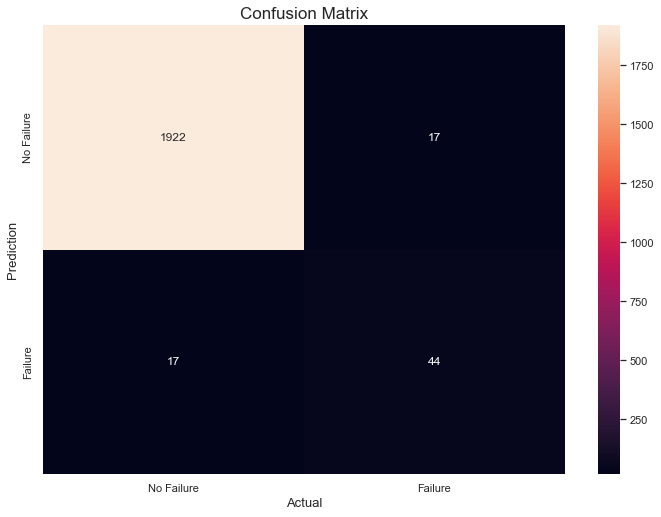

In [29]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Failure','Failure'],
            yticklabels=['No Failure','Failure'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [30]:
import pickle
model = gs.best_estimator_
pickle.dump(model, open('random_forest_fail_classifier.pkl', 'wb'))

### Multiclass classification

In [31]:
df_multi = df.drop(["Target",'Type'], axis=1, errors="ignore")
df_multi.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,H,L,M
0,298.1,308.6,1551,42.8,0,No Failure,0,0,1
1,298.2,308.7,1408,46.3,3,No Failure,0,1,0
2,298.1,308.5,1498,49.4,5,No Failure,0,1,0
3,298.2,308.6,1433,39.5,7,No Failure,0,1,0
4,298.2,308.7,1408,40.0,9,No Failure,0,1,0
5,298.1,308.6,1425,41.9,11,No Failure,0,0,1
6,298.1,308.6,1558,42.4,14,No Failure,0,1,0
7,298.1,308.6,1527,40.2,16,No Failure,0,1,0
8,298.3,308.7,1667,28.6,18,No Failure,0,0,1
9,298.5,309.0,1741,28.0,21,No Failure,0,0,1


In [32]:
df_multi["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

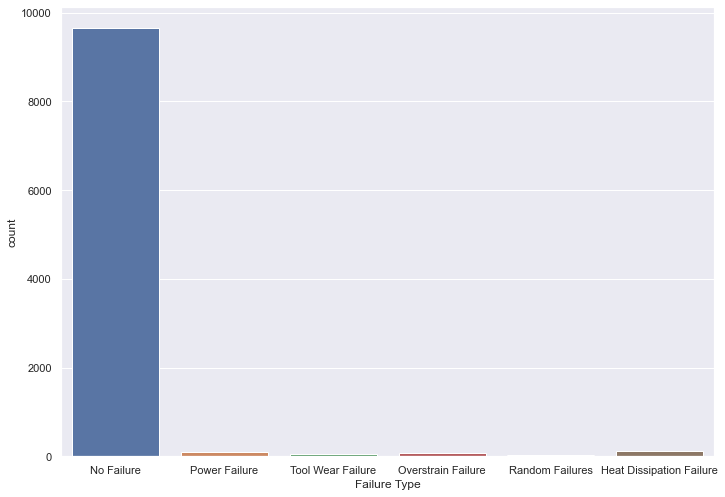

In [33]:
sns.countplot(data=df_multi, x="Failure Type")

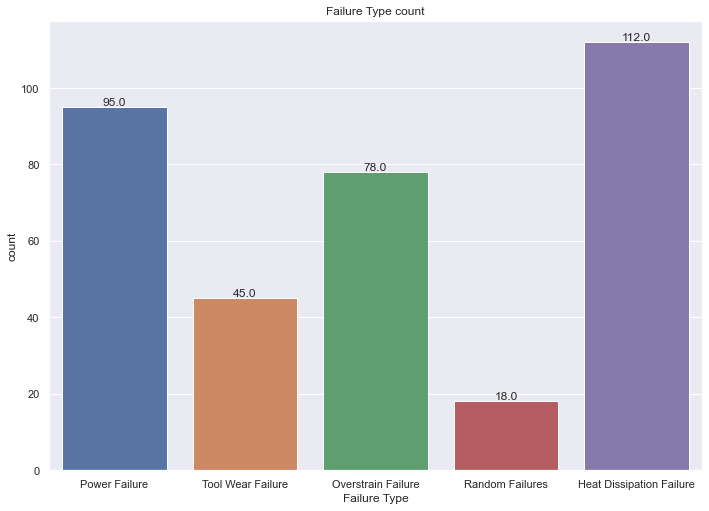

In [34]:
ax = sns.countplot(data=df_multi[df_multi["Failure Type"] != "No Failure"], x="Failure Type")
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title("Failure Type count")

In [35]:
df_multi_grouped = df_multi.groupby("Failure Type").mean()
df_multi_grouped.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
Failure Type,,,,,,,,
Heat Dissipation Failure,302.567857,310.799107,1337.964286,52.778571,107.339286,0.071429,0.660714,0.267857
No Failure,299.972855,309.994343,1540.324389,39.624316,106.678927,0.101430,0.596457,0.302114
Overstrain Failure,299.867949,310.051282,1354.243590,56.878205,208.217949,0.012821,0.935897,0.051282
Power Failure,300.075789,309.954737,1763.968421,48.514737,101.884211,0.052632,0.621053,0.326316
Random Failures,300.766667,310.755556,1489.444444,43.522222,119.888889,0.222222,0.666667,0.111111


[None, None, None, None, None, None, None, None, None, None, None, None]

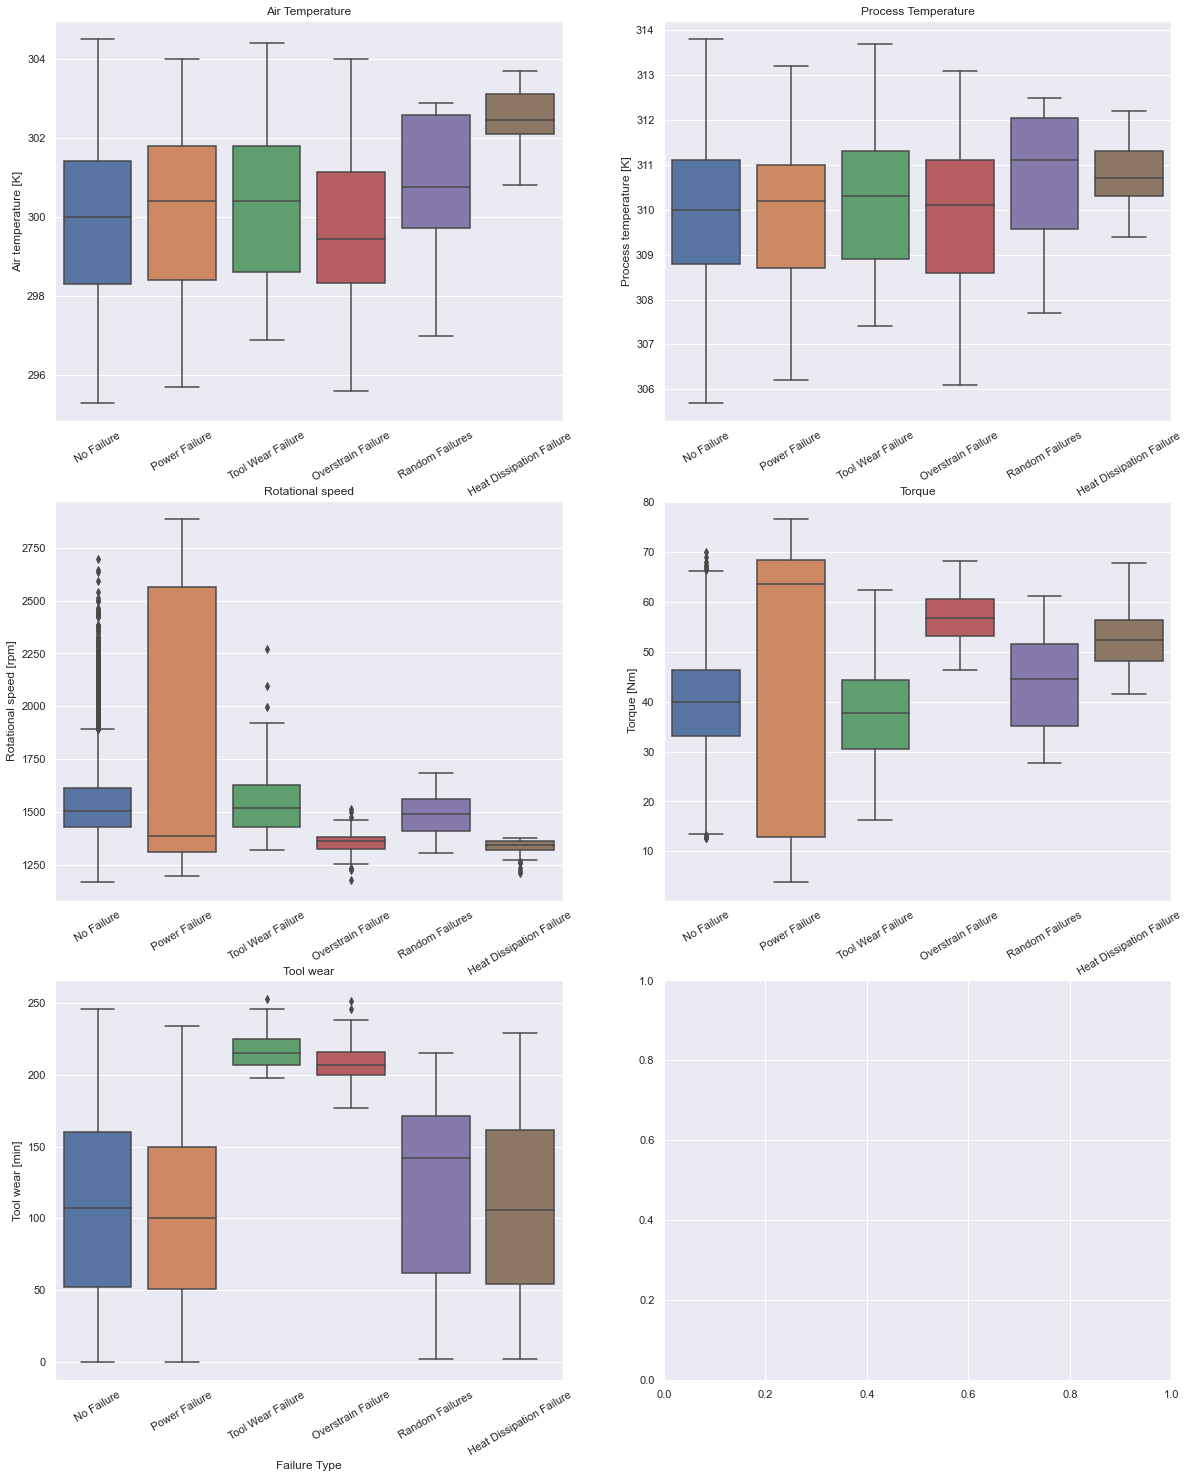

In [36]:
sns.set(rc={'figure.figsize':(20,25)})
fig, axes = plt.subplots(3, 2)
g1 = sns.boxplot(data=df_multi, y="Air temperature [K]", x="Failure Type", ax=axes[0,0])
g2 = sns.boxplot(data=df_multi, y="Process temperature [K]", x="Failure Type", ax=axes[0,1])
g3 = sns.boxplot(data=df_multi, y="Rotational speed [rpm]", x="Failure Type", ax=axes[1,0])
g4 = sns.boxplot(data=df_multi, y="Torque [Nm]", x="Failure Type", ax=axes[1,1])
g5 = sns.boxplot(data=df_multi, y="Tool wear [min]", x="Failure Type", ax=axes[2,0])

g1.set_title("Air Temperature")
g2.set_title("Process Temperature")
g3.set_title("Rotational speed")
g4.set_title("Torque")
g5.set_title("Tool wear")
plt.setp(axes[0,0].get_xticklabels(), rotation=30)
plt.setp(axes[0,1].get_xticklabels(), rotation=30)
plt.setp(axes[1,0].get_xticklabels(), rotation=30)
plt.setp(axes[1,1].get_xticklabels(), rotation=30)
plt.setp(axes[2,0].get_xticklabels(), rotation=30)

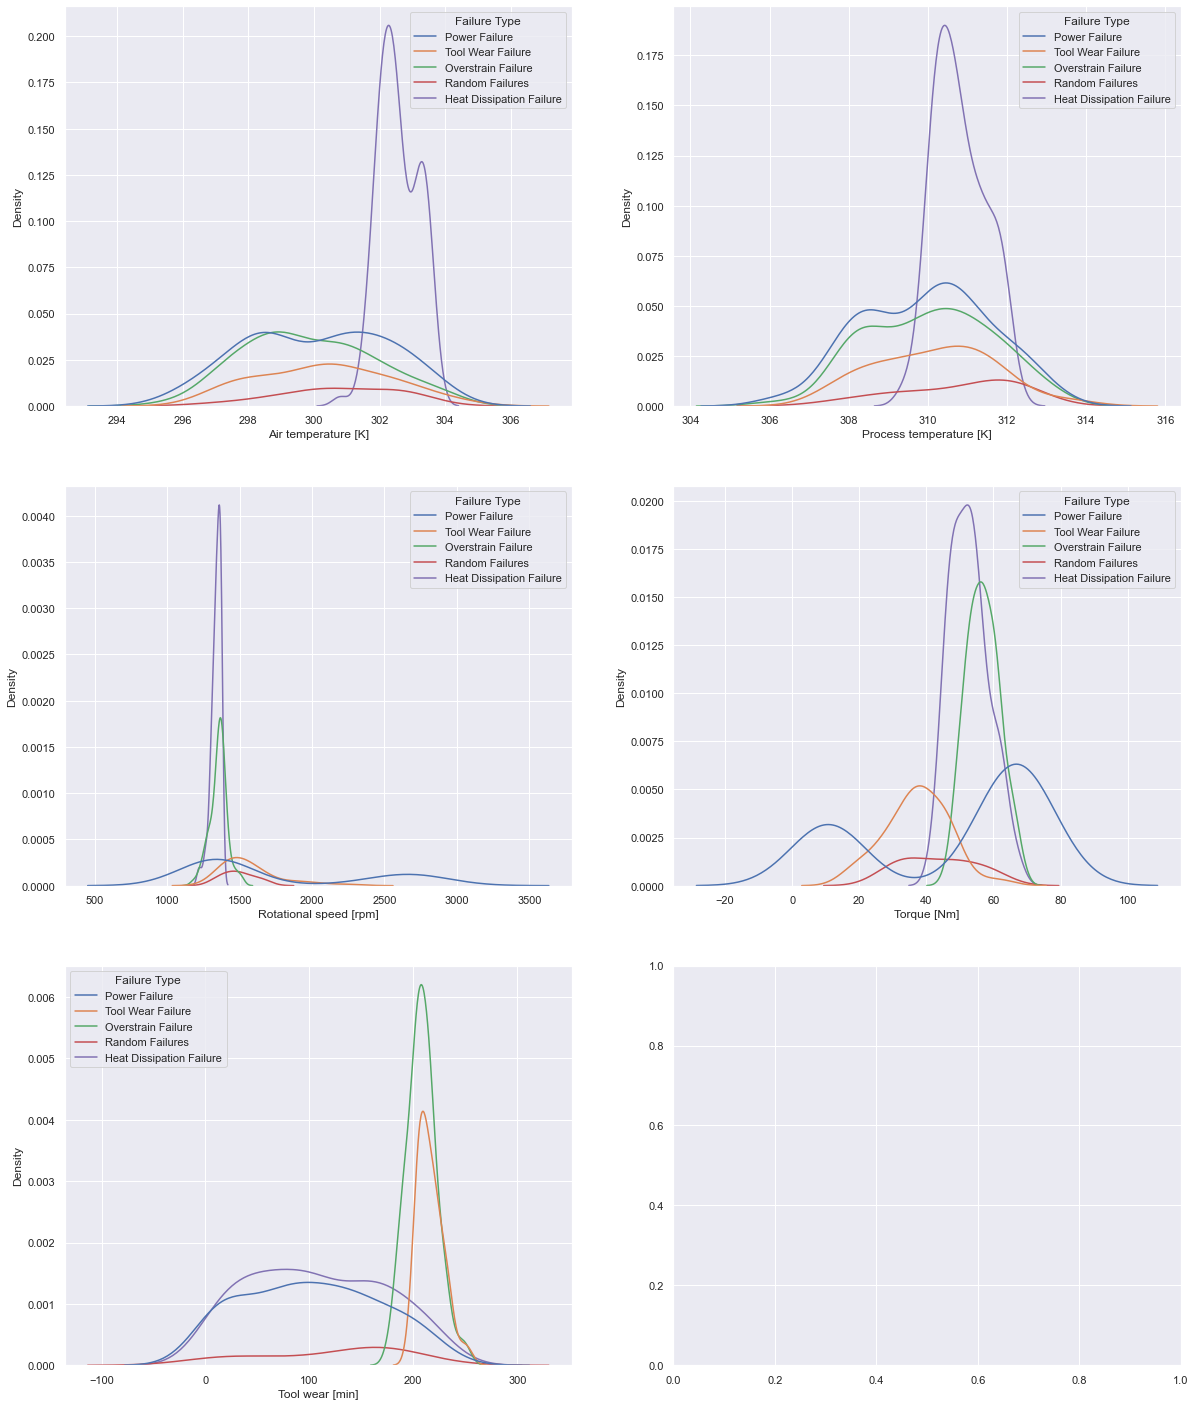

In [37]:
fig, axes = plt.subplots(3, 2)
df_failure = df_multi[~(df_multi['Failure Type']=='No Failure')]
sns.kdeplot(data=df_failure, x="Air temperature [K]", hue="Failure Type", ax=axes[0,0])
sns.kdeplot(data=df_failure, x="Process temperature [K]", hue="Failure Type", ax=axes[0,1])
sns.kdeplot(data=df_failure, x="Rotational speed [rpm]", hue="Failure Type", ax=axes[1,0])
sns.kdeplot(data=df_failure, x="Torque [Nm]", hue="Failure Type", ax=axes[1,1])
sns.kdeplot(data=df_failure, x="Tool wear [min]", hue="Failure Type", ax=axes[2,0])

<seaborn.axisgrid.PairGrid object at 0x0000021098572770>

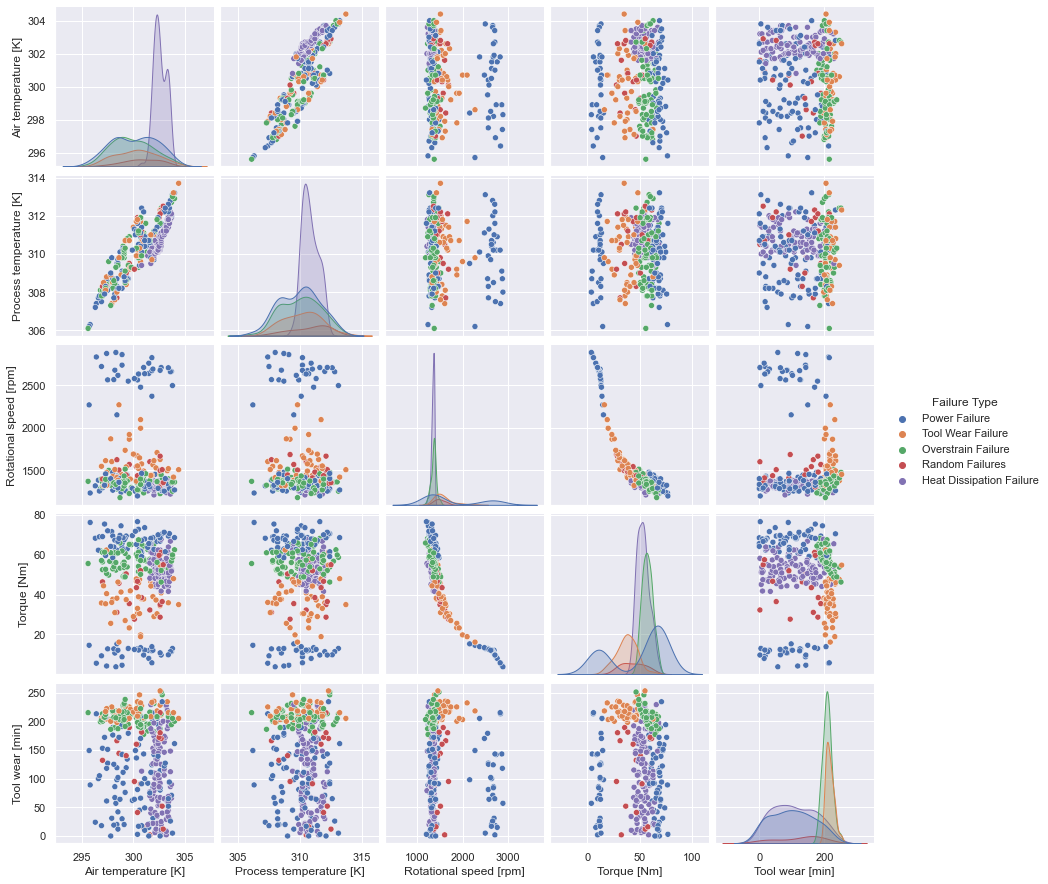

In [38]:
sns.pairplot(data=df_failure.drop(['H','M','L'],axis=1), hue="Failure Type", plot_kws=dict(alpha=1.0))

In [39]:
from sklearn.model_selection import train_test_split

X_multi = df_multi.drop("Failure Type", axis=1)
y_multi = df_multi["Failure Type"]

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
X_multi_train.shape, X_multi_test.shape, y_multi_train.shape, y_multi_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_multi_train = ohe.fit_transform(y_multi_train.values.reshape(-1, 1))
y_multi_test = ohe.transform(y_multi_test.values.reshape(-1, 1))

In [41]:
y_multi_train = pd.DataFrame(y_multi_train.toarray(), columns=ohe.categories_)
y_multi_test = pd.DataFrame(y_multi_test.toarray(), columns=ohe.categories_)
y_multi_train.head(10)

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
y_multi_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Heat Dissipation Failure,8000.0,0.012125,0.109451,0.0,0.0,0.0,0.0,1.0
No Failure,8000.0,0.964625,0.184737,0.0,1.0,1.0,1.0,1.0
Overstrain Failure,8000.0,0.008125,0.089777,0.0,0.0,0.0,0.0,1.0
Power Failure,8000.0,0.009375,0.096376,0.0,0.0,0.0,0.0,1.0
Random Failures,8000.0,0.001500,0.038703,0.0,0.0,0.0,0.0,1.0
Tool Wear Failure,8000.0,0.004250,0.065057,0.0,0.0,0.0,0.0,1.0


In [43]:
X_multi_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],8000.0,300.009925,2.002224,295.3,298.3,300.1,301.50,304.5
Process temperature [K],8000.0,310.006088,1.486484,305.7,308.8,310.1,311.10,313.8
Rotational speed [rpm],8000.0,1538.776625,180.594083,1181.0,1423.0,1502.0,1611.25,2886.0
Torque [Nm],8000.0,40.007800,9.979156,3.8,33.2,40.2,46.80,76.2
Tool wear [min],8000.0,108.068750,63.225052,0.0,53.0,108.0,162.00,253.0
H,8000.0,0.100250,0.300352,0.0,0.0,0.0,0.00,1.0
L,8000.0,0.597000,0.490531,0.0,0.0,1.0,1.00,1.0
M,8000.0,0.302750,0.459477,0.0,0.0,0.0,1.00,1.0


In [44]:
to_scale = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

sc = StandardScaler()
X_multi_train[to_scale] = sc.fit_transform(X_multi_train[to_scale])
X_multi_test[to_scale] = sc.transform(X_multi_test[to_scale])

In [45]:
X_multi_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],8000.0,-3.342171e-14,1.000063,-2.352493,-0.854066,0.044990,0.744256,2.242683
Process temperature [K],8000.0,-2.343170e-14,1.000063,-2.897008,-0.811420,0.063182,0.735952,2.552432
Rotational speed [rpm],8000.0,1.811884e-16,1.000063,-1.981233,-0.641128,-0.203655,0.401330,7.460419
Torque [Nm],8000.0,-3.126388e-16,1.000063,-3.628570,-0.682245,0.019261,0.680681,3.627006
Tool wear [min],8000.0,9.414691e-17,1.000063,-1.709378,-0.871050,-0.001087,0.853058,2.292451
H,8000.0,1.002500e-01,0.300352,0.000000,0.000000,0.000000,0.000000,1.000000
L,8000.0,5.970000e-01,0.490531,0.000000,0.000000,1.000000,1.000000,1.000000
M,8000.0,3.027500e-01,0.459477,0.000000,0.000000,0.000000,1.000000,1.000000


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="micro")
    recall = recall_score(y_test, y_pred, average="micro")
    f1 = f1_score(y_test, y_pred, average="micro")
    
    return accuracy, precision, recall, f1

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

result = {}
for model,name in zip([knn, dtc, rfc],
                     ["KNN", "Decision Tree", "Random Forest"]):
    result[name] = fit_model(model, X_multi_train, X_multi_test, y_multi_train, y_multi_test)

In [48]:
df_result = pd.DataFrame(np.array(list(result.values())),
                       columns= ["ACCURACY", "PRECISION", "RECALL", "F1-SCORE"], 
                       index= result.keys())

df_result.index.name = "Model"   # name the index of the result1 dataframe as 'Model'
df_result

,ACCURACY,PRECISION,RECALL,F1-SCORE
Model,,,,
KNN,0.9730,0.976908,0.9730,0.974950
Decision Tree,0.9715,0.971500,0.9715,0.971500
Random Forest,0.9795,0.983928,0.9795,0.981709


In [49]:
grid_params = {
    "max_depth": [2, 4, 6, 8, 10, 12, 15, 20],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [2, 3, 4, 5, 6]
}

gs = GridSearchCV(rfc, grid_params, cv=5,n_jobs=-1)
print(fit_model(gs, X_multi_train, X_multi_test, y_multi_train, y_multi_test))
print(f"Best model: {gs.best_estimator_}")

(0.978, 0.9814350225790266, 0.978, 0.9797145003756573)
Best model: RandomForestClassifier(max_depth=15, min_samples_leaf=2, random_state=42)


In [50]:
y_pred = gs.best_estimator_.predict(X_multi_test)


In [51]:
print(classification_report(y_multi_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.98      1.00      0.99      1935
           2       1.00      0.31      0.47        13
           3       0.88      0.70      0.78        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

   micro avg       0.98      0.98      0.98      2000
   macro avg       0.64      0.41      0.48      2000
weighted avg       0.97      0.98      0.97      2000
 samples avg       0.98      0.98      0.98      2000



In [52]:
matrix = confusion_matrix(y_multi_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[   7    8    0    0    0    0]
 [   2 1931    0    2    0    0]
 [   3    6    4    0    0    0]
 [   2    4    0   14    0    0]
 [   0    6    0    0    0    0]
 [   0   11    0    0    0    0]]


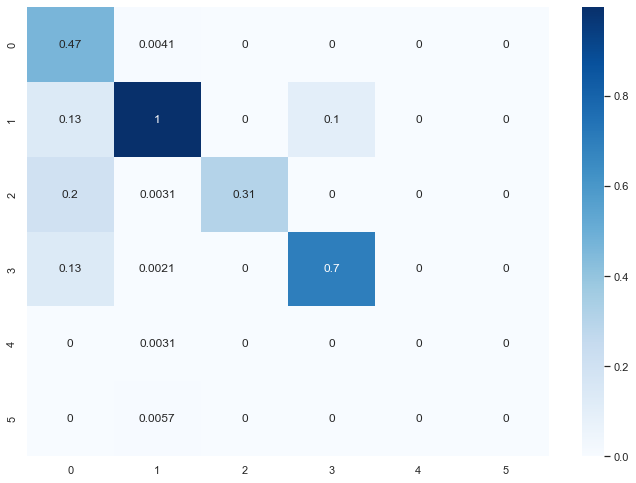

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
matrix_normlized = matrix / matrix.astype(np.float).sum(axis=1)
sns.heatmap(matrix_normlized, annot=True, cmap="Blues")

In [54]:
model  = gs.best_estimator_

In [55]:
import pickle
pickle.dump(model, open('random_forest_MCC.pkl', 'wb'))